In [1]:
from glob import glob
from astropy.io import fits
from astropy.visualization import hist
from astropy.modeling import fitting
from astropy.modeling.models import custom_model
fitter = fitting.LevMarLSQFitter()
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import scipy.ndimage as ndi
import astropy.stats as astrostats

# configuration
np.set_printoptions(linewidth=120) # para que se vea

cmap = plt.get_cmap("magma")
cmap.set_bad(color="r")
cmap.set_over(color="w")
if "astro" in plt.colormaps():
    colormaps.unregister("astro")
colormaps.register(cmap,name="astro")
plt.rcParams["image.origin"] = "lower"
plt.rcParams["image.cmap"] = "astro"
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.labelsize"] = 15



def quantile_linspace(arr,num=100,lower=0.01,upper=0.99):
    return np.linspace(*np.quantile(np.ravel(arr),[lower,upper]),num=num)

def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

def quantile_hist(data,num=100,lower=0.01,upper=0.99):
    return plt.hist(np.ravel(data),bins=quantile_linspace(np.ravel(data),num,lower,upper))

def pseudomode(arr,sigma=1.6,maxiters=20):
    masked = astrostats.sigma_clip(arr,sigma=sigma,maxiters=maxiters)
    return arr[~masked.mask].mean()

In [2]:
glob('*')

['10_10000',
 '1_10000',
 '2_10000',
 '3_10000',
 '4_10000',
 '5_10000',
 '6_10000',
 '7_10000',
 '8_10000',
 '9_10000',
 'Lab6.ipynb',
 'Lab6.zip',
 'Laboratorio_6.ipynb']

In [3]:
datos = glob('6_10000')

In [4]:
for i in datos:
    #files_path = glob(i + '/*.txt')
    archivos = glob(i + '/*.txt')

In [5]:
times = []
intensidad = []
n = 10000
i = 0
estrellas = [] #ID de las estrellas
while (i<n):
    data = np.loadtxt(archivos[i])
    times.append(data[:,0])
    intensidad.append(data[:,1])
    estrellas.append(archivos[i])
    i=i+1


In [7]:
from scipy.stats import skew 
from scipy.stats import entropy

In [61]:
mean = []
std_dev = []
mediana = []
MAD = []
amplitud = []
skewness = []
entropia = []
max_mag = []
for i in range(len(intensidad)):
    mean.append(intensidad[i].mean())
    std_dev.append(intensidad[i].std())
    mediana.append(np.median(intensidad[i]))
    MAD.append((intensidad[i]-intensidad[i].mean()).mean())
    amplitud.append(max(intensidad[i]) - min(intensidad[i]))
    skewness.append(skew(intensidad[i]))
    max_mag.append(max(intensidad[i]))
    base = np.max(max_mag)
    entropia.append(entropy(intensidad[i], base=base))

In [62]:
#Modelo de polinomio
array_mean = np.array(mean)
array_std = np.array(std_dev)
array_mediana = np.array(amplitud)
array_mad = np.array(MAD)
array_amplitud = np.array(amplitud)
array_skew = np.array(skewness)
array_entropy = np.array(entropia)

In [11]:
coefs = np.polyfit(array_mean, array_std, 3)
polynomial = np.poly1d(coefs)
y_pred = polynomial(array_mean) * 1.4
above_curve_sigma = array_std > y_pred

In [189]:
filtered_stars_sigma = [string for string, boolean in zip(estrellas, above_curve_sigma) if boolean]
len(filtered_stars_sigma )  #me muestra los datos txt que están arriba de la curva

746

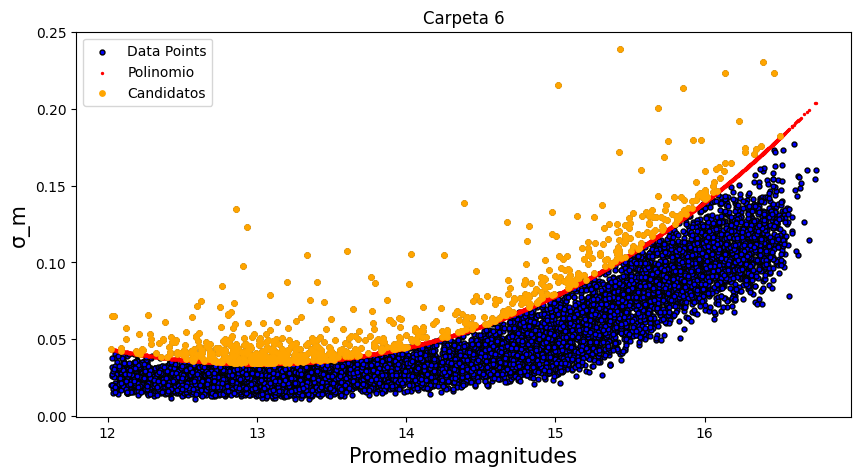

In [176]:
plt.scatter(mean, std_dev, marker='.', color='blue', edgecolor='k', s=50, label='Data Points')
plt.scatter(array_mean, y_pred, color='r', s=2, label='Polinomio')
plt.scatter(array_mean[above_curve_sigma], array_std[above_curve_sigma], color='orange', s=15, label='Candidatos')
plt.xlabel('Promedio magnitudes')
plt.ylabel('σ_m')
plt.title('Carpeta 6')
plt.legend()
plt.savefig('Sigma_carpeta6.png')

In [14]:
mean_candidatos_sigma = array_mean[above_curve_sigma]
std_candidatos = array_std[above_curve_sigma]

In [15]:
coefs_ampl = np.polyfit(array_mean, array_amplitud, 3)
polynomial_a = np.poly1d(coefs_ampl)
y_pred_ampl = polynomial_a(array_mean) * 1.4
above_curve_ampl = array_amplitud > y_pred_ampl

In [16]:
mean_candidatos_ampl = array_mean[above_curve_ampl]
ampl_candidatos = array_amplitud[above_curve_ampl]

In [17]:
filtered_stars_ampl = [string for string, boolean in zip(estrellas, above_curve_ampl) if boolean]
filtered_stars_ampl

['6_10000\\D2b27954523.txt',
 '6_10000\\D2b27954542.txt',
 '6_10000\\D2b27954549.txt',
 '6_10000\\D2b27954550.txt',
 '6_10000\\D2b27954566.txt',
 '6_10000\\D2b27954595.txt',
 '6_10000\\D2b27954603.txt',
 '6_10000\\D2b27954626.txt',
 '6_10000\\D2b27954639.txt',
 '6_10000\\D2b27954648.txt',
 '6_10000\\D2b27954653.txt',
 '6_10000\\D2b27954664.txt',
 '6_10000\\D2b27954667.txt',
 '6_10000\\D2b27954678.txt',
 '6_10000\\D2b27954697.txt',
 '6_10000\\D2b27954712.txt',
 '6_10000\\D2b27954714.txt',
 '6_10000\\D2b27954724.txt',
 '6_10000\\D2b27954727.txt',
 '6_10000\\D2b27954730.txt',
 '6_10000\\D2b27954731.txt',
 '6_10000\\D2b27954738.txt',
 '6_10000\\D2b27954749.txt',
 '6_10000\\D2b27954750.txt',
 '6_10000\\D2b27954763.txt',
 '6_10000\\D2b27954773.txt',
 '6_10000\\D2b27954784.txt',
 '6_10000\\D2b27954795.txt',
 '6_10000\\D2b27954797.txt',
 '6_10000\\D2b27954800.txt',
 '6_10000\\D2b27954804.txt',
 '6_10000\\D2b27954812.txt',
 '6_10000\\D2b27954816.txt',
 '6_10000\\D2b27954842.txt',
 '6_10000\\D2b

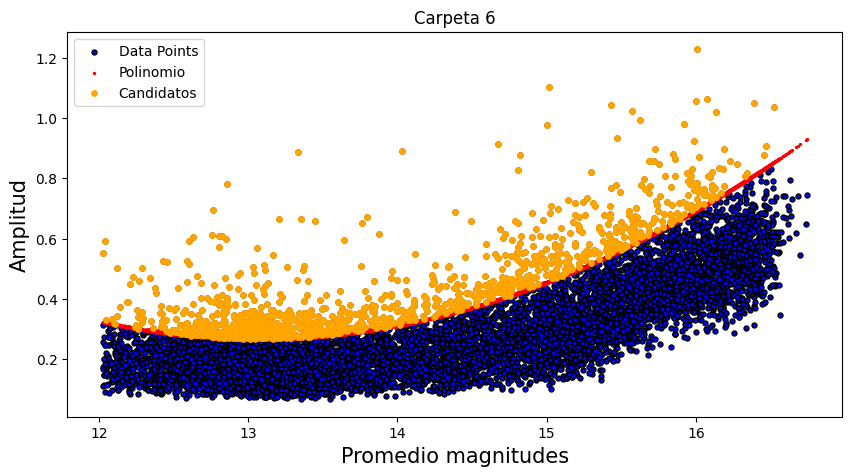

In [177]:
plt.scatter(mean, amplitud, marker='.', color='blue', edgecolor='k', s=50, label='Data Points')
plt.scatter(array_mean, y_pred_ampl, color='r', s=2, label='Polinomio')
plt.scatter(mean_candidatos_ampl, ampl_candidatos, color='orange', s=15, label='Candidatos')
plt.xlabel('Promedio magnitudes')
plt.ylabel('Amplitud')
plt.title('Carpeta 6')
plt.legend()
plt.savefig('Amplitud_carpeta6.png')

In [254]:
def combine_and_remove_duplicates(a,b,c,d):
    lista = list(set(a + b + c + d))
    return lista

In [20]:
Candidatas = []

In [21]:
"""union = combine_and_remove_duplicates(filtered_stars_sigma, filtered_stars_ampl)
len(union)
Candidatas.append(union)
len(Candidatas)"""

1

In [23]:
coefs_skew = np.polyfit(array_mean, array_skew, 3)
polynomial_skew = np.poly1d(coefs_skew)
y_pred_skew = polynomial_skew(array_mean) * 1.4
above_curve_skew = array_skew > y_pred_skew

In [24]:
mean_candidatos_skew = array_mean[above_curve_skew]
skew_candidatos = array_amplitud[above_curve_skew]

In [81]:
def func_ajuste(x, a, c, d):
    return a*np.exp(-c*x)+d

In [82]:
from scipy.optimize import curve_fit

In [83]:
parameters, covariance = curve_fit(func_ajuste, mean, skewness)

C:\Users\valen\AppData\Local\Temp\ipykernel_8232\3191546480.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parameters, covariance = curve_fit(func_ajuste, mean, skewness)


In [85]:
fitA = parameters[0]
fitC = parameters[1]
fitD = parameters[2]
fitA, fitC, fitD

(3301795.413311973, 294366.0187724502, 0.2426067610515048)

In [87]:
type(fitA)

numpy.float64

In [88]:
pred_skew = func_ajuste(array_mean, fitA, fitC, fitD)

In [125]:
def monoExpZeroB(x, m, t):
    return m * np.exp(-t * x)

# perform the fit using the function where B is 0
p0 = (45, .4) # start with values near those we expect
paramsB, cv = curve_fit(monoExpZeroB, array_mean, skewness, p0)
mB, tB = paramsB
sampleRate = 20_000 # Hz
tauSec = (1 / tB) / sampleRate


In [126]:
mB, tB

(3.4148584649701514e-05, -0.6209676553867577)

In [131]:
ys2B = monoExpZeroB(array_mean, 70, 0.2)

In [166]:
coefs_skewness=np.polyfit(mean,skewness,4)
polynomial_skewness = -np.poly1d(coefs_skewness)+4

y_pred_skewness = polynomial_skewness(mean)
#plt.scatter(x_fit,polynomial(x_fit), color='green', linestyle='--', label='Fit',linewidths=0.01)

x_fit = np.linspace(min(mean), max(mean), 100)
above_curve_skewness = skewness > y_pred_skewness

In [167]:
min(mean), max(mean)

(12.023696969696969, 16.74422807017544)

In [168]:
mean_candidates_skew = array_mean[above_curve_skewness]
skew_candidates = array_skew[above_curve_skewness]

In [170]:
filtered_stars_skew = [string for string, boolean in zip(estrellas, above_curve_skewness) if boolean]
filtered_stars_skew

['6_10000\\D2b27954552.txt',
 '6_10000\\D2b27954678.txt',
 '6_10000\\D2b27954682.txt',
 '6_10000\\D2b27954700.txt',
 '6_10000\\D2b27954712.txt',
 '6_10000\\D2b27954744.txt',
 '6_10000\\D2b27954765.txt',
 '6_10000\\D2b27954767.txt',
 '6_10000\\D2b27954776.txt',
 '6_10000\\D2b27954894.txt',
 '6_10000\\D2b27954958.txt',
 '6_10000\\D2b27955013.txt',
 '6_10000\\D2b27955104.txt',
 '6_10000\\D2b27955116.txt',
 '6_10000\\D2b27955169.txt',
 '6_10000\\D2b27955172.txt',
 '6_10000\\D2b27955176.txt',
 '6_10000\\D2b27955184.txt',
 '6_10000\\D2b27955206.txt',
 '6_10000\\D2b2795522.txt',
 '6_10000\\D2b27955258.txt',
 '6_10000\\D2b27955265.txt',
 '6_10000\\D2b27955293.txt',
 '6_10000\\D2b27955366.txt',
 '6_10000\\D2b27955369.txt',
 '6_10000\\D2b27955375.txt',
 '6_10000\\D2b27955379.txt',
 '6_10000\\D2b27955445.txt',
 '6_10000\\D2b27955452.txt',
 '6_10000\\D2b27955494.txt',
 '6_10000\\D2b27955509.txt',
 '6_10000\\D2b2795558.txt',
 '6_10000\\D2b27955710.txt',
 '6_10000\\D2b27955744.txt',
 '6_10000\\D2b27

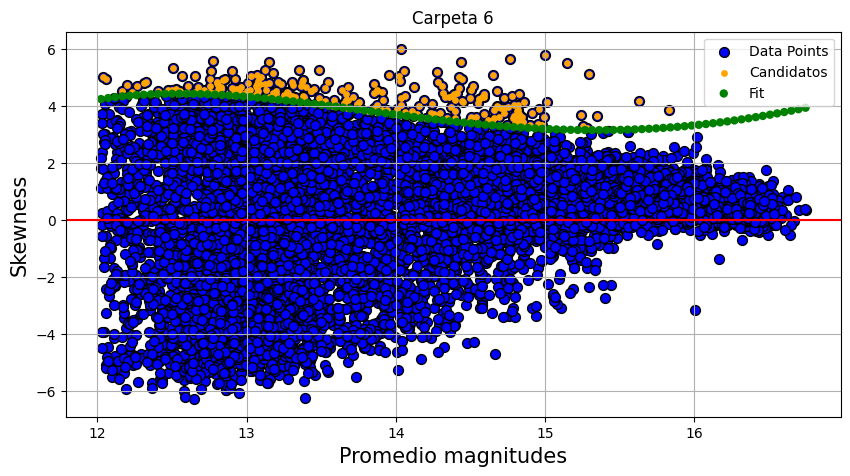

In [178]:
plt.scatter(mean, skewness, color='blue', edgecolor='k', s=50, label='Data Points')
#plt.scatter(array_mean, y_pred_skew, color='r', s=2, label='Polinomio')
plt.scatter(mean_candidates_skew, skew_candidates, color='orange', s=15, label='Candidatos')
#plt.scatter(array_mean, pred_skew, color='g', label='Ajuste' )
#plt.plot(array_mean, ys2B, '--', color='orange', label="zero B")
plt.scatter(x_fit,polynomial_skewness(x_fit), color='green', linestyle='--', label='Fit',linewidths=0.01)
plt.xlabel('Promedio magnitudes')
plt.ylabel('Skewness')
plt.axhline(0, color="r", linestyle="-")
plt.grid()
plt.legend()
plt.title('Carpeta 6')
plt.savefig('Skewness_carpeta6.png')


In [63]:
entropia

[1.6070924126122388,
 1.4582418134224173,
 1.4699247680137686,
 1.4975480922720206,
 1.5028258872689877,
 1.5028257806621867,
 1.4381805290193044,
 1.4956824785928964,
 1.4564353726856416,
 1.5009584092412682,
 1.4737899818021154,
 1.5009575876669243,
 1.462314636296871,
 1.4443725475000886,
 1.50095752302185,
 1.4956866891163667,
 1.4381810885621489,
 1.5009580265222842,
 1.4484678801452766,
 1.4828748730573413,
 1.4660959873476842,
 1.4660945716915328,
 1.4828815114517024,
 1.4989104142410965,
 1.4773716194680968,
 1.4989099279088707,
 1.4989098036204764,
 1.4989103671830302,
 1.4544474508368945,
 1.4936394150843055,
 1.4484773707831504,
 1.4936465534270809,
 1.466095671897608,
 1.498909441786335,
 1.4717802172898533,
 1.4989092486349007,
 1.4717800633040834,
 1.4484746390053802,
 1.4989087448556786,
 1.4936459428379738,
 1.4936443271626767,
 1.493646832978392,
 1.4989103624447977,
 1.4423920538978339,
 1.4989098705260697,
 1.4936472651103623,
 1.4936440222766456,
 1.4989102598490351

In [171]:
coefs_entropy = np.polyfit(array_mean, array_entropy, 3)
polynomial_entropy = np.poly1d(coefs_entropy)
y_pred_entropy = polynomial_entropy(array_mean) 
above_curve_entropy = array_entropy > y_pred_entropy

In [172]:
mean_candidates_entropy = array_mean[above_curve_entropy]
entropy_candidates = array_entropy[above_curve_entropy]

In [174]:
filtered_stars_entropy = [string for string, boolean in zip(estrellas, above_curve_entropy) if boolean]
len(filtered_stars_entropy)

6256

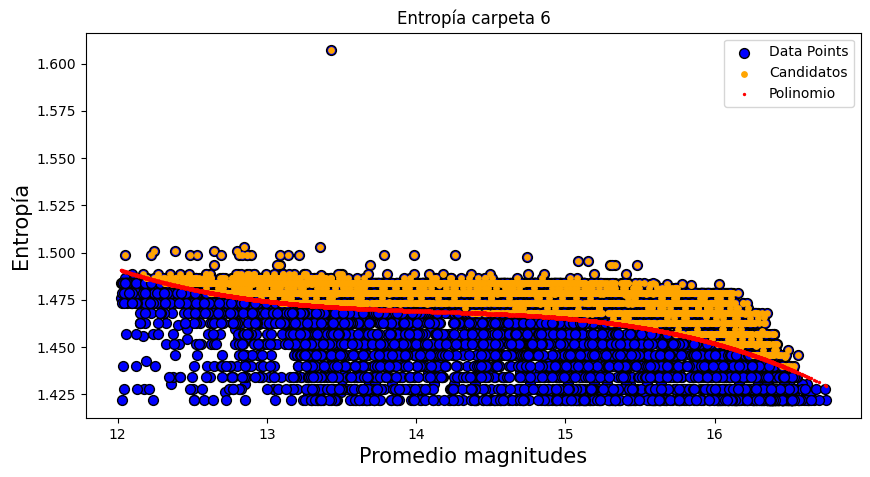

In [179]:
plt.scatter(mean, entropia, color='blue',edgecolors='k', s=50, label='Data Points')
plt.scatter(mean_candidates_entropy, entropy_candidates, color='orange', s=15, label='Candidatos')
plt.scatter(array_mean, y_pred_entropy, color='r', s=2, label='Polinomio')
plt.xlabel('Promedio magnitudes')
plt.ylabel('Entropía')
plt.title('Entropía carpeta 6')
plt.legend()
plt.savefig('entropia_carpeta6.png')

In [31]:
#Unión estrellas. Preguntar
candidatos_mean = []
candidatos_mean.append(mean_candidatos_sigma)
candidatos_mean.append(mean_candidatos_ampl)
stars = []
stars.append(std_candidatos)
stars.append(ampl_candidatos)

In [30]:
#Para la carpeta 9
datos_9 = glob('9_10000')
for i in datos_9:
    #files_path = glob(i + '/*.txt')
    archivos_9 = glob(i + '/*.txt')

In [31]:
times_9 = []
intensidad_9 = []
m = 10000
j = 0
estrellas_9 = []
while (j<m):
    data_9 = np.loadtxt(archivos_9[j])
    times_9.append(data_9[:,0])
    intensidad_9.append(data_9[:,1])
    estrellas_9.append(archivos_9[j])
    j=j+1


In [67]:
mean_9 = []
std_dev_9 = []
mediana_9 = []
MAD_9 = []
amplitud_9 = []
skewness_9 = []
max_mag_9 = []
entropia_9 = []
for i in range(len(intensidad_9)):
    mean_9.append(intensidad_9[i].mean())
    std_dev_9.append(intensidad_9[i].std())
    mediana_9.append(np.median(intensidad_9[i]))
    MAD_9.append((intensidad_9[i]-intensidad_9[i].mean()).mean())
    amplitud_9.append(max(intensidad_9[i]) - min(intensidad_9[i]))
    skewness_9.append(skew(intensidad_9[i]))
    max_mag_9.append(max(intensidad_9[i]))
    base_9 = np.max(max_mag_9)
    entropia_9.append(entropy(intensidad_9[i], base=base_9))

In [68]:
#Modelo de polinomio
array_mean_9 = np.array(mean_9)
array_std_9 = np.array(std_dev_9)
array_mediana_9 = np.array(amplitud_9)
array_mad_9 = np.array(MAD_9)
array_amplitud_9 = np.array(amplitud_9)
array_skew_9 = np.array(skewness_9)
array_entropy_9 = np.array(entropia_9)


In [34]:
coefs_9 = np.polyfit(array_mean_9, array_std_9, 3)
polynomial_9 = np.poly1d(coefs_9)
y_pred_9 = polynomial(array_mean_9) * 1.4
above_curve_sigma_9 = array_std_9 > y_pred_9

In [35]:
mean_candidatos_sigma_9 = array_mean_9[above_curve_sigma_9]
std_candidatos_9 = array_std_9[above_curve_sigma_9]

In [36]:
filtered_stars_sigma_9 = [string for string, boolean in zip(estrellas_9, above_curve_sigma_9) if boolean]
filtered_stars_sigma_9   #me muestra los datos txt que están arriba de la curva

['9_10000\\D2b27981724.txt',
 '9_10000\\D2b27981733.txt',
 '9_10000\\D2b27981737.txt',
 '9_10000\\D2b27981742.txt',
 '9_10000\\D2b27981753.txt',
 '9_10000\\D2b27981756.txt',
 '9_10000\\D2b27981757.txt',
 '9_10000\\D2b27981779.txt',
 '9_10000\\D2b27981829.txt',
 '9_10000\\D2b27981842.txt',
 '9_10000\\D2b27981862.txt',
 '9_10000\\D2b27981866.txt',
 '9_10000\\D2b27981871.txt',
 '9_10000\\D2b27981873.txt',
 '9_10000\\D2b27981884.txt',
 '9_10000\\D2b27981893.txt',
 '9_10000\\D2b27981922.txt',
 '9_10000\\D2b27981938.txt',
 '9_10000\\D2b27981969.txt',
 '9_10000\\D2b27981971.txt',
 '9_10000\\D2b27981984.txt',
 '9_10000\\D2b27982002.txt',
 '9_10000\\D2b27982011.txt',
 '9_10000\\D2b27982052.txt',
 '9_10000\\D2b27982054.txt',
 '9_10000\\D2b27982057.txt',
 '9_10000\\D2b27982068.txt',
 '9_10000\\D2b27982072.txt',
 '9_10000\\D2b27982075.txt',
 '9_10000\\D2b27982078.txt',
 '9_10000\\D2b27982083.txt',
 '9_10000\\D2b27982096.txt',
 '9_10000\\D2b27982104.txt',
 '9_10000\\D2b27982106.txt',
 '9_10000\\D2b

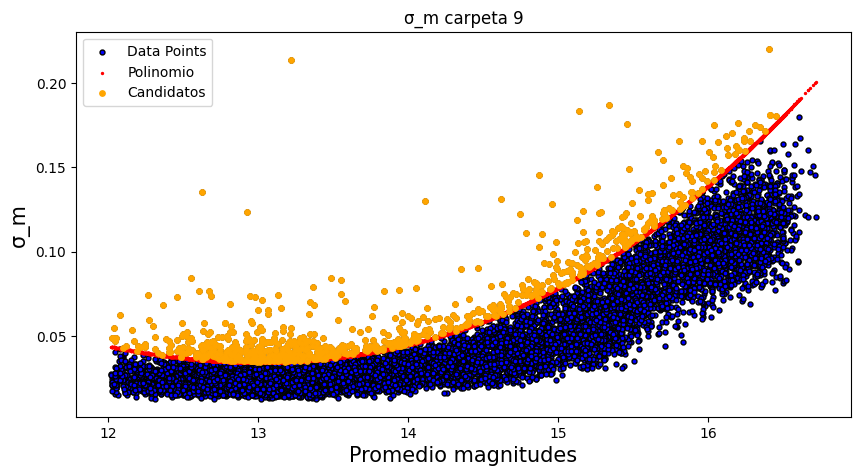

In [180]:
plt.scatter(mean_9, std_dev_9, marker='.', color='blue', edgecolor='k', s=50, label='Data Points')
plt.scatter(array_mean_9, y_pred_9, color='r', s=2, label='Polinomio')
plt.scatter(mean_candidatos_sigma_9, std_candidatos_9, color='orange', s=15, label='Candidatos')
plt.xlabel('Promedio magnitudes')
plt.ylabel('σ_m')
plt.title('σ_m carpeta 9')
plt.legend()
plt.savefig('sigma_carpeta9.png')

In [38]:
coefs_ampl_9 = np.polyfit(array_mean_9, array_amplitud_9, 3)
polynomial_a_9 = np.poly1d(coefs_ampl_9)
y_pred_ampl_9 = polynomial_a_9(array_mean_9) * 1.4
above_curve_ampl_9 = array_amplitud_9 > y_pred_ampl_9

In [39]:
mean_candidatos_ampl_9 = array_mean_9[above_curve_ampl_9]
ampl_candidatos_9 = array_amplitud_9[above_curve_ampl_9]

In [40]:
filtered_stars_ampl_9 = [string for string, boolean in zip(estrellas_9, above_curve_ampl_9) if boolean]
filtered_stars_ampl_9  #me muestra los datos txt que están arriba de la curva

['9_10000\\D2b27981718.txt',
 '9_10000\\D2b27981724.txt',
 '9_10000\\D2b27981737.txt',
 '9_10000\\D2b27981742.txt',
 '9_10000\\D2b27981757.txt',
 '9_10000\\D2b27981766.txt',
 '9_10000\\D2b27981772.txt',
 '9_10000\\D2b27981779.txt',
 '9_10000\\D2b27981797.txt',
 '9_10000\\D2b27981811.txt',
 '9_10000\\D2b27981829.txt',
 '9_10000\\D2b27981842.txt',
 '9_10000\\D2b27981862.txt',
 '9_10000\\D2b27981865.txt',
 '9_10000\\D2b27981866.txt',
 '9_10000\\D2b27981871.txt',
 '9_10000\\D2b27981873.txt',
 '9_10000\\D2b27981884.txt',
 '9_10000\\D2b27981885.txt',
 '9_10000\\D2b27981889.txt',
 '9_10000\\D2b27981893.txt',
 '9_10000\\D2b27981922.txt',
 '9_10000\\D2b27981923.txt',
 '9_10000\\D2b27981938.txt',
 '9_10000\\D2b27981945.txt',
 '9_10000\\D2b27981950.txt',
 '9_10000\\D2b27981956.txt',
 '9_10000\\D2b27981967.txt',
 '9_10000\\D2b27981969.txt',
 '9_10000\\D2b27981971.txt',
 '9_10000\\D2b27981984.txt',
 '9_10000\\D2b27981990.txt',
 '9_10000\\D2b27981999.txt',
 '9_10000\\D2b27982011.txt',
 '9_10000\\D2b

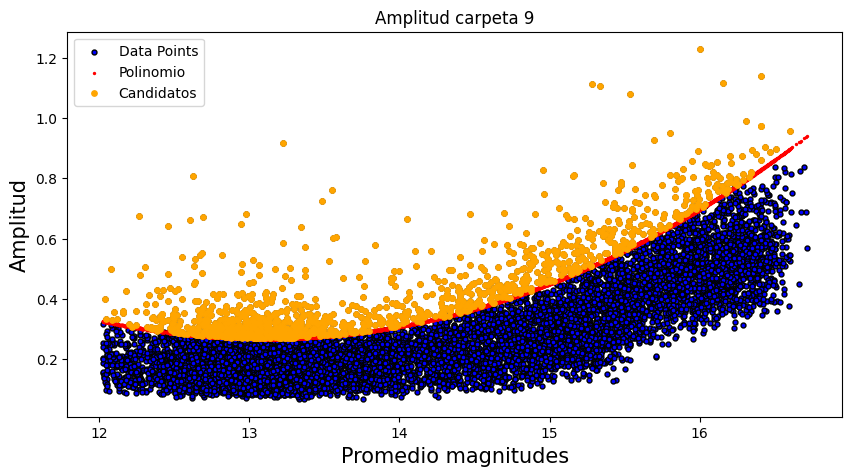

In [181]:
plt.scatter(mean_9, amplitud_9, marker='.', color='blue', edgecolor='k', s=50, label='Data Points')
plt.scatter(array_mean_9, y_pred_ampl_9, color='r', s=2, label='Polinomio')
plt.scatter(mean_candidatos_ampl_9, ampl_candidatos_9, color='orange', s=15, label='Candidatos')
plt.xlabel('Promedio magnitudes')
plt.ylabel('Amplitud')
plt.title('Amplitud carpeta 9')
plt.legend()
plt.savefig('Amplitud_carpeta9.png')

In [209]:
coefs_skewness_9 =np.polyfit(mean_9,skewness_9,3)
polynomial_skewness_9 = np.poly1d(coefs_skewness_9) - 3

y_pred_skewness_9 = polynomial_skewness_9(mean_9) * 1.4
#plt.scatter(x_fit,polynomial(x_fit), color='green', linestyle='--', label='Fit',linewidths=0.01)

x_fit_9 = np.linspace(min(mean_9), max(mean_9), 100)
above_curve_skewness_9 = skewness_9 < y_pred_skewness_9

In [210]:
mean_candidates_skew_9 = array_mean_9[above_curve_skewness_9]
skew_candidates_9 = array_skew_9[above_curve_skewness_9]

In [212]:
filtered_stars_skew_9 = [string for string, boolean in zip(estrellas_9, above_curve_skewness_9) if boolean]
filtered_stars_skew_9

['9_10000\\D2b27981747.txt',
 '9_10000\\D2b27981752.txt',
 '9_10000\\D2b27981889.txt',
 '9_10000\\D2b27981966.txt',
 '9_10000\\D2b27981967.txt',
 '9_10000\\D2b27981990.txt',
 '9_10000\\D2b27982031.txt',
 '9_10000\\D2b27982052.txt',
 '9_10000\\D2b27982063.txt',
 '9_10000\\D2b27982082.txt',
 '9_10000\\D2b27982103.txt',
 '9_10000\\D2b27982108.txt',
 '9_10000\\D2b27982134.txt',
 '9_10000\\D2b27982165.txt',
 '9_10000\\D2b27982245.txt',
 '9_10000\\D2b27982251.txt',
 '9_10000\\D2b27982279.txt',
 '9_10000\\D2b27982339.txt',
 '9_10000\\D2b27982364.txt',
 '9_10000\\D2b27982417.txt',
 '9_10000\\D2b27982420.txt',
 '9_10000\\D2b27982423.txt',
 '9_10000\\D2b27982429.txt',
 '9_10000\\D2b27982434.txt',
 '9_10000\\D2b27982444.txt',
 '9_10000\\D2b27982465.txt',
 '9_10000\\D2b27982495.txt',
 '9_10000\\D2b27982506.txt',
 '9_10000\\D2b27982545.txt',
 '9_10000\\D2b27982721.txt',
 '9_10000\\D2b27982805.txt',
 '9_10000\\D2b27982814.txt',
 '9_10000\\D2b27982855.txt',
 '9_10000\\D2b27982867.txt',
 '9_10000\\D2b

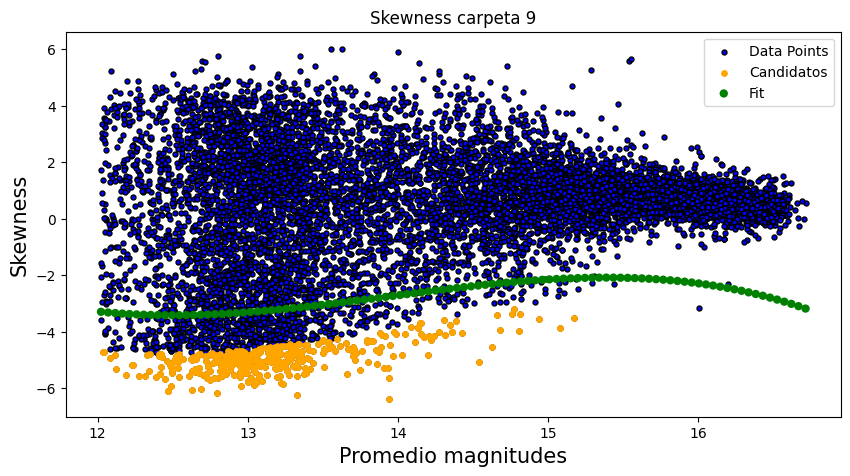

In [213]:
plt.scatter(mean_9, skewness_9, marker='.', color='blue', edgecolor='k', s=50, label='Data Points')

plt.scatter(mean_candidates_skew_9, skew_candidates_9, color='orange', s=15, label='Candidatos')
plt.scatter(x_fit_9,polynomial_skewness_9(x_fit_9), color='green', linestyle='--', label='Fit',linewidths=0.01)
plt.xlabel('Promedio magnitudes')
plt.ylabel('Skewness')
plt.title('Skewness carpeta 9')
plt.legend()
plt.savefig('Skewness_carpeta9.png')

In [242]:
coefs_entropy_9 = np.polyfit(array_mean_9, array_entropy_9, 3)
polynomial_entropy_9 = np.poly1d(coefs_entropy_9) +0.01
y_pred_entropy_9 = polynomial_entropy_9(array_mean_9) 
above_curve_entropy_9 = array_entropy_9 > y_pred_entropy_9

In [243]:
mean_candidates_entropy_9 = array_mean_9[above_curve_entropy_9]
entropy_candidates_9 = array_entropy_9[above_curve_entropy_9]

In [244]:
filtered_stars_entropy_9 = [string for string, boolean in zip(estrellas_9, above_curve_entropy_9) if boolean]
len(filtered_stars_entropy_9)

3004

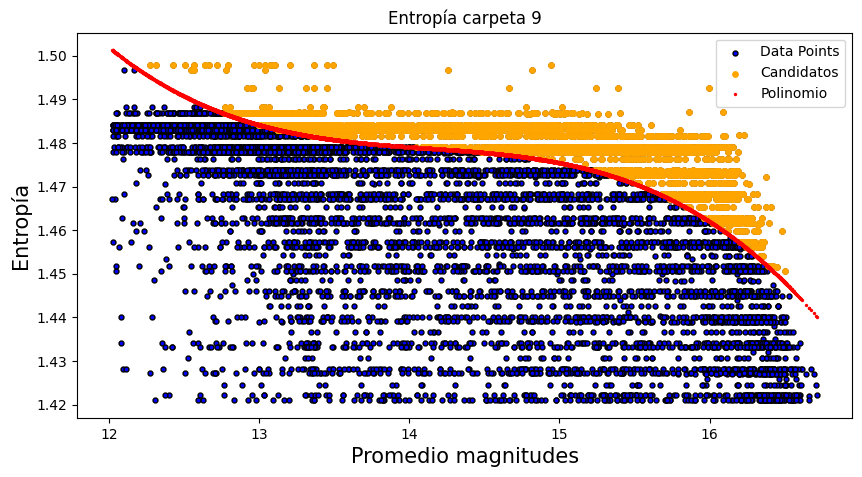

In [246]:
plt.scatter(mean_9, entropia_9, marker='.', color='blue', edgecolor='k', s=50, label='Data Points')

plt.scatter(mean_candidates_entropy_9, entropy_candidates_9, color='orange', s=15, label='Candidatos')
plt.scatter(array_mean_9, y_pred_entropy_9, color='r', s=2, label='Polinomio')

plt.xlabel('Promedio magnitudes')
plt.ylabel('Entropía')
plt.title('Entropía carpeta 9')
plt.legend()
plt.savefig('entropia_carpeta9.png')

In [45]:
#Unión estrellas. Preguntar
candidatos_mean_9 = []
candidatos_mean_9.append(mean_candidatos_sigma_9)
candidatos_mean_9.append(mean_candidatos_ampl_9)
stars_9 = []
stars_9.append(std_candidatos_9)
stars_9.append(ampl_candidatos_9)

In [44]:
union_9 = combine_and_remove_duplicates(filtered_stars_sigma_9, filtered_stars_ampl_9)
len(union_9)
Candidatas.append(union_9)
len(Candidatas)

2

In [ ]:
#Para la carpeta 2

In [44]:
datos_2 = glob('2_10000')
for i in datos_2:
    #files_path = glob(i + '/*.txt')
    archivos_2 = glob(i + '/*.txt')

In [45]:
times_2 = []
intensidad_2 = []
l = 10000
k = 0
estrellas_2 = []
while (k<l):
    data_2 = np.loadtxt(archivos_2[k])
    times_2.append(data_2[:,0])
    intensidad_2.append(data_2[:,1])
    estrellas_2.append(archivos_2[k])
    k=k+1


In [75]:
mean_2 = []
std_dev_2 = []
mediana_2 = []
MAD_2 = []
amplitud_2 = []
skewness_2 = []
max_mag_2 = []
entropia_2 = []
for i in range(len(intensidad_2)):
    mean_2.append(intensidad_2[i].mean())
    std_dev_2.append(intensidad_2[i].std())
    mediana_2.append(np.median(intensidad_2[i]))
    MAD_2.append((intensidad_2[i]-intensidad_2[i].mean()).mean())
    amplitud_2.append(max(intensidad_2[i]) - min(intensidad_2[i]))
    skewness_2.append(skew(intensidad_2[i]))
    max_mag_2.append(max(intensidad_2[i]))
    base_2 = np.max(max_mag_2)
    entropia_2.append(entropy(intensidad_2[i], base=17.268))

In [76]:
#Modelo de polinomio
array_mean_2 = np.array(mean_2)
array_std_2 = np.array(std_dev_2)
array_mediana_2 = np.array(amplitud_2)
array_mad_2 = np.array(MAD_2)
array_amplitud_2 = np.array(amplitud_2)
array_skew_2 = np.array(skewness_2)
array_entropy_2 = np.array(entropia_2)

In [48]:
coefs_2 = np.polyfit(array_mean_2, array_std_2, 3)
polynomial_2 = np.poly1d(coefs_2)
y_pred_2 = polynomial(array_mean_2) * 1.4
above_curve_sigma_2 = array_std_2 > y_pred_2

In [49]:
mean_candidatos_sigma_2 = array_mean_2[above_curve_sigma_2]
std_candidatos_2 = array_std_2[above_curve_sigma_2]

In [50]:
filtered_stars_sigma_2 = [string for string, boolean in zip(estrellas_2, above_curve_sigma_2) if boolean]
filtered_stars_sigma_2  

['2_10000\\D2b27910012.txt',
 '2_10000\\D2b27910019.txt',
 '2_10000\\D2b27910023.txt',
 '2_10000\\D2b27910029.txt',
 '2_10000\\D2b27910034.txt',
 '2_10000\\D2b27910036.txt',
 '2_10000\\D2b27910052.txt',
 '2_10000\\D2b27910076.txt',
 '2_10000\\D2b27910107.txt',
 '2_10000\\D2b27910110.txt',
 '2_10000\\D2b27910126.txt',
 '2_10000\\D2b27910157.txt',
 '2_10000\\D2b27910158.txt',
 '2_10000\\D2b27910173.txt',
 '2_10000\\D2b27910182.txt',
 '2_10000\\D2b27910186.txt',
 '2_10000\\D2b27910187.txt',
 '2_10000\\D2b27910196.txt',
 '2_10000\\D2b27910205.txt',
 '2_10000\\D2b27910225.txt',
 '2_10000\\D2b27910272.txt',
 '2_10000\\D2b27910280.txt',
 '2_10000\\D2b27910289.txt',
 '2_10000\\D2b27910317.txt',
 '2_10000\\D2b27910318.txt',
 '2_10000\\D2b27910346.txt',
 '2_10000\\D2b27910351.txt',
 '2_10000\\D2b27910404.txt',
 '2_10000\\D2b27910426.txt',
 '2_10000\\D2b27910446.txt',
 '2_10000\\D2b27910451.txt',
 '2_10000\\D2b27910481.txt',
 '2_10000\\D2b27910492.txt',
 '2_10000\\D2b27910499.txt',
 '2_10000\\D2b

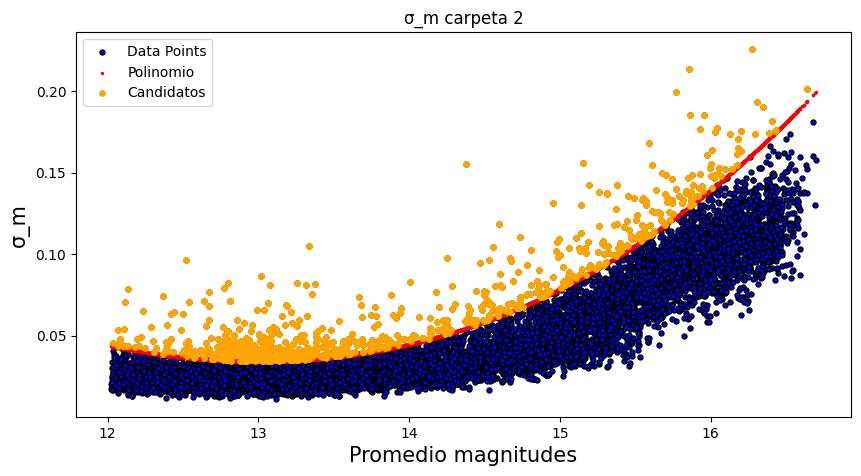

In [184]:
plt.scatter(mean_2, std_dev_2, marker='.',color='blue', edgecolor='k', s=50, label='Data Points')
plt.scatter(array_mean_2, y_pred_2, color='r', s=2, label='Polinomio')
plt.scatter(mean_candidatos_sigma_2, std_candidatos_2, color='orange', s=15, label='Candidatos')
plt.xlabel('Promedio magnitudes')
plt.ylabel('σ_m')
plt.title('σ_m carpeta 2')
plt.legend()
plt.savefig('sigma_carpeta2.png')

In [53]:
coefs_ampl_2 = np.polyfit(array_mean_2, array_amplitud_2, 3)
polynomial_a_2 = np.poly1d(coefs_ampl_2)
y_pred_ampl_2 = polynomial_a_2(array_mean_2) * 1.4
above_curve_ampl_2 = array_amplitud_2 > y_pred_ampl_2

In [54]:
mean_candidatos_ampl_2 = array_mean_2[above_curve_ampl_2]
ampl_candidatos_2 = array_amplitud_2[above_curve_ampl_2]

In [55]:
filtered_stars_ampl_2 = [string for string, boolean in zip(estrellas_2, above_curve_ampl_2) if boolean]
filtered_stars_ampl_2  #m

['2_10000\\D2b27910023.txt',
 '2_10000\\D2b27910024.txt',
 '2_10000\\D2b27910034.txt',
 '2_10000\\D2b27910038.txt',
 '2_10000\\D2b27910046.txt',
 '2_10000\\D2b27910052.txt',
 '2_10000\\D2b27910076.txt',
 '2_10000\\D2b27910104.txt',
 '2_10000\\D2b27910107.txt',
 '2_10000\\D2b27910125.txt',
 '2_10000\\D2b27910126.txt',
 '2_10000\\D2b27910129.txt',
 '2_10000\\D2b27910138.txt',
 '2_10000\\D2b27910141.txt',
 '2_10000\\D2b27910153.txt',
 '2_10000\\D2b27910157.txt',
 '2_10000\\D2b27910158.txt',
 '2_10000\\D2b27910173.txt',
 '2_10000\\D2b27910182.txt',
 '2_10000\\D2b27910186.txt',
 '2_10000\\D2b27910195.txt',
 '2_10000\\D2b27910196.txt',
 '2_10000\\D2b27910220.txt',
 '2_10000\\D2b27910225.txt',
 '2_10000\\D2b27910244.txt',
 '2_10000\\D2b27910272.txt',
 '2_10000\\D2b27910274.txt',
 '2_10000\\D2b27910280.txt',
 '2_10000\\D2b27910289.txt',
 '2_10000\\D2b27910307.txt',
 '2_10000\\D2b27910317.txt',
 '2_10000\\D2b27910318.txt',
 '2_10000\\D2b27910346.txt',
 '2_10000\\D2b27910361.txt',
 '2_10000\\D2b

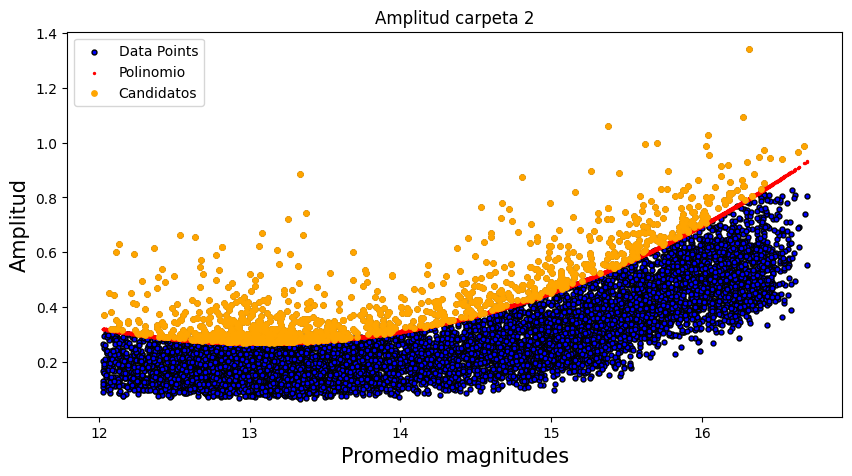

In [185]:
plt.scatter(mean_2, amplitud_2, marker='.', color='blue', edgecolor='k', s=50, label='Data Points')
plt.scatter(array_mean_2, y_pred_ampl_2, color='r', s=2, label='Polinomio')
plt.scatter(mean_candidatos_ampl_2, ampl_candidatos_2, color='orange', s=15, label='Candidatos')
plt.xlabel('Promedio magnitudes')
plt.ylabel('Amplitud')
plt.title('Amplitud carpeta 2')
plt.legend()
plt.savefig('Amplitud_carpeta2.png')

In [227]:
coefs_skewness_2 =np.polyfit(mean_2,skewness_2,3)
polynomial_skewness_2 = np.poly1d(coefs_skewness_2) -3

y_pred_skewness_2 = polynomial_skewness_2(mean_2) * 1.4
#plt.scatter(x_fit,polynomial(x_fit), color='green', linestyle='--', label='Fit',linewidths=0.01)

x_fit_2 = np.linspace(min(mean_2), max(mean_2), 100)
above_curve_skewness_2 = skewness_2 < y_pred_skewness_2

In [228]:
mean_candidates_skew_2 = array_mean_2[above_curve_skewness_2]
skew_candidates_2 = array_skew_2[above_curve_skewness_2]

In [229]:
filtered_stars_skew_2 = [string for string, boolean in zip(estrellas_2, above_curve_skewness_2) if boolean]
filtered_stars_skew_2  #m

['2_10000\\D2b27910023.txt',
 '2_10000\\D2b27910038.txt',
 '2_10000\\D2b27910112.txt',
 '2_10000\\D2b27910150.txt',
 '2_10000\\D2b27910170.txt',
 '2_10000\\D2b27910179.txt',
 '2_10000\\D2b27910195.txt',
 '2_10000\\D2b27910233.txt',
 '2_10000\\D2b27910290.txt',
 '2_10000\\D2b27910296.txt',
 '2_10000\\D2b27910363.txt',
 '2_10000\\D2b27910392.txt',
 '2_10000\\D2b27910393.txt',
 '2_10000\\D2b27910440.txt',
 '2_10000\\D2b27910443.txt',
 '2_10000\\D2b27910473.txt',
 '2_10000\\D2b27910505.txt',
 '2_10000\\D2b27910557.txt',
 '2_10000\\D2b27910559.txt',
 '2_10000\\D2b27910576.txt',
 '2_10000\\D2b27910590.txt',
 '2_10000\\D2b27910599.txt',
 '2_10000\\D2b27910604.txt',
 '2_10000\\D2b27910742.txt',
 '2_10000\\D2b27910816.txt',
 '2_10000\\D2b27910828.txt',
 '2_10000\\D2b27910830.txt',
 '2_10000\\D2b27910889.txt',
 '2_10000\\D2b27910980.txt',
 '2_10000\\D2b27911010.txt',
 '2_10000\\D2b27911106.txt',
 '2_10000\\D2b27911143.txt',
 '2_10000\\D2b27911153.txt',
 '2_10000\\D2b27911180.txt',
 '2_10000\\D2b

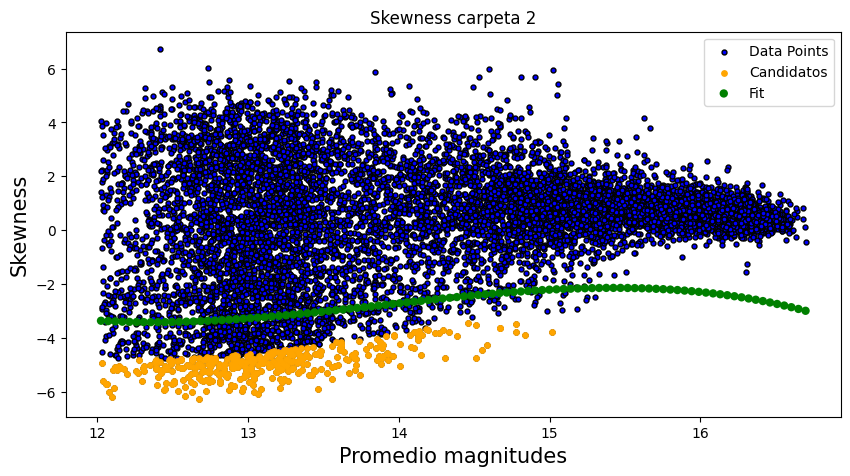

In [232]:
plt.scatter(mean_2, skewness_2, marker='.', color='blue', edgecolor='k', s=50, label='Data Points')

plt.scatter(mean_candidates_skew_2, skew_candidates_2, color='orange', s=15, label='Candidatos')
plt.scatter(x_fit_2,polynomial_skewness_2(x_fit_2), color='green', linestyle='--', label='Fit',linewidths=0.01)

plt.xlabel('Promedio magnitudes')
plt.ylabel('Skewness')
plt.title('Skewness carpeta 2')
plt.legend()
plt.savefig('Skewness_carpeta2_siii.png')

In [247]:
coefs_entropy_2 = np.polyfit(array_mean_2, array_entropy_2, 3)
polynomial_entropy_2 = np.poly1d(coefs_entropy_2) +0.01
y_pred_entropy_2 = polynomial_entropy_2(array_mean_2) 
above_curve_entropy_2 = array_entropy_2 > y_pred_entropy_2

In [248]:
mean_candidates_entropy_2 = array_mean_2[above_curve_entropy_2]
entropy_candidates_2 = array_entropy_2[above_curve_entropy_2]

In [249]:
filtered_stars_entropy_2 = [string for string, boolean in zip(estrellas_2, above_curve_entropy_2) if boolean]
len(filtered_stars_entropy_2)

2867

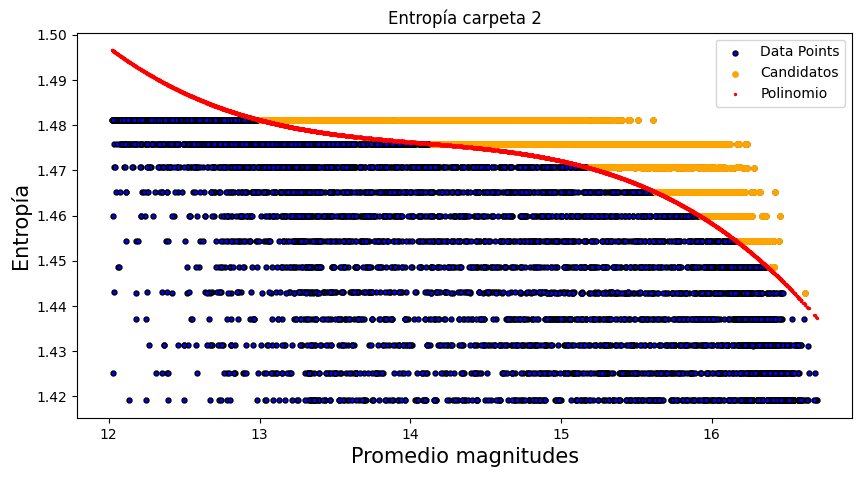

In [251]:
plt.scatter(mean_2, entropia_2, marker='.', color='blue', edgecolor='k', s=50, label='Data Points')


plt.scatter(mean_candidates_entropy_2, entropy_candidates_2, color='orange', s=15, label='Candidatos')
plt.scatter(array_mean_2, y_pred_entropy_2, color='r', s=2, label='Polinomio')

plt.xlabel('Promedio magnitudes')
plt.ylabel('Entropía')
plt.title('Entropía carpeta 2')
plt.legend()
plt.savefig('entropia_carpeta2.png')

In [56]:
#Unión estrellas. Preguntar
candidatos_mean_2 = []
candidatos_mean_2.append(mean_candidatos_sigma_2)
candidatos_mean_2.append(mean_candidatos_ampl_2)
stars_2 = []
stars_2.append(std_candidatos_2)
stars_2.append(ampl_candidatos_2)

In [60]:
len(mean_candidatos_sigma_9), len(mean_candidatos_ampl_9)

(778, 1184)

In [57]:
union_2 = combine_and_remove_duplicates(filtered_stars_sigma_2, filtered_stars_ampl_2)
len(union_2)
#Candidatas.append(union_2)
#len(Candidatas)

3

In [74]:
todas_base = max(base, base_2, base_9)
todas_base

17.268

In [190]:
len(filtered_stars_sigma), len(filtered_stars_ampl), len(filtered_stars_skew), len(filtered_stars_entropy)

(746, 1182, 237, 6256)

In [252]:
len(filtered_stars_sigma_9), len(filtered_stars_ampl_9), len(filtered_stars_skew_9), len(filtered_stars_entropy_9)

(778, 1184, 354, 3004)

In [253]:
len(filtered_stars_sigma_2), len(filtered_stars_ampl_2), len(filtered_stars_skew_2), len(filtered_stars_entropy_2)

(771, 1145, 347, 2867)

In [258]:
union_6 = combine_and_remove_duplicates(filtered_stars_sigma, filtered_stars_ampl, filtered_stars_skew, filtered_stars_entropy)
len(union_6)
union_9 = combine_and_remove_duplicates(filtered_stars_sigma_9, filtered_stars_ampl_9, filtered_stars_skew_9, filtered_stars_entropy_9)
len(union_9)
union_2 = combine_and_remove_duplicates(filtered_stars_sigma_2, filtered_stars_ampl_2, filtered_stars_skew_2, filtered_stars_entropy_2)

In [259]:
len(union_6), len(union_9), len(union_2)

(6777, 3972, 3882)

In [ ]:
#Informe candidatas de variables, entropía, skewness, sigma, amplitud. 
#Para la próxima clase traer Lombe scargle. Que esté funcionando
#
